In [42]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [43]:
# CSVファイルを読み込み
df = pd.read_csv("0527walking_trajectory.csv")

# 必要な列があるか確認
if not set(['time','x', 'y',]).issubset(df.columns):
    raise ValueError("CSVに 'time','x', 'y',列が必要です")


# X-tグラフの描画

## データ抽出

In [44]:
# xの移動距離 = 現在のX座標 - 初期x座標
x_distance = df['x'] - df['x'].iloc[0] # iloc[n]はデータにより可変
y_distance = df['y'] - df['y'].iloc[0]


total_distance  = np.sqrt(x_distance**2 + y_distance**2)
time = df['time']

# 結果をDataFrameにまとめる
x_t = pd.DataFrame({
	'time':time,
	'total_distance':total_distance,
	})

print(x_t)


     time  total_distance
0    7.25        0.000000
1    7.50        0.188277
2    7.75        0.376553
3    8.00        0.550545
4    8.25        0.727005
5    8.50        0.906187
6    8.75        1.086233
7    9.00        1.261742
8    9.25        1.433917
9    9.50        1.608457
10   9.75        1.787485
11  10.00        1.961507
12  10.25        1.974202
13  10.50        1.986897
14  10.75        1.999593
15  11.00        2.012290
16  11.25        2.024987
17  11.50        2.037685
18  11.75        2.050383
19  12.00        2.063082
20  12.25        2.075781
21  12.50        2.088480
22  12.75        2.101180
23  13.00        2.113881
24  13.25        2.126582
25  13.50        2.139283
26  13.75        2.151985
27  14.00        2.164687
28  14.25        2.177389
29  14.50        2.190092
30  14.75        2.202796
31  15.00        2.215500
32  15.25        2.228204
33  15.50        2.240908
34  15.75        2.253613
35  16.00        2.266319
36  16.25        2.279024
37  16.50   

## グラフの描画

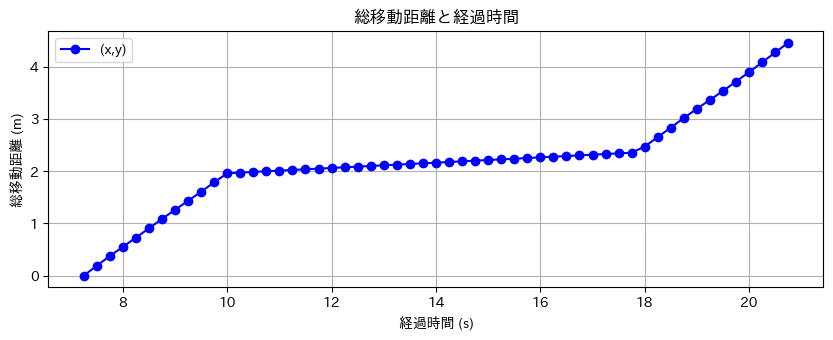

In [45]:

plt.figure(figsize=(10, 5))
plt.plot(time, total_distance, marker='o', linestyle='-', color='blue', label='(x,y)')
plt.xlabel('経過時間 (s)')
plt.ylabel('総移動距離 (m)')
plt.title('総移動距離と経過時間')
# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()

In [46]:

# 座標差分と時間差分を計算
dt = df['time'].diff()
dx = df['x'].diff()
dy = df['y'].diff()


# 移動距離と速度を計算（速度 = 距離 / 時間）
distance = np.sqrt(dx**2 + dy**2)
speed = distance / dt

# 1行目はNaNになるので除外
speed = speed[1:].reset_index(drop=True)

# 結果をDataFrameにまとめる
result_df = pd.DataFrame({'speed': speed})

       speed
0   0.753107
1   0.753107
2   0.719489
3   0.719694
4   0.716873
5   0.722508
6   0.704780
7   0.706880
8   0.709709
9   0.719905
10  0.699085
11  0.050950
12  0.050950
13  0.050950
14  0.050950
15  0.050950
16  0.050950
17  0.050950
18  0.050950
19  0.050950
20  0.050950
21  0.050950
22  0.050950
23  0.050950
24  0.050950
25  0.050950
26  0.050950
27  0.050950
28  0.050950
29  0.050950
30  0.050950
31  0.050950
32  0.050950
33  0.050950
34  0.050950
35  0.050950
36  0.050950
37  0.050950
38  0.050950
39  0.050950
40  0.050950
41  0.050950
42  0.480915
43  0.736160
44  0.731738
45  0.730734
46  0.719065
47  0.719918
48  0.717945
49  0.725374
50  0.725374
51  0.751041
52  0.756096
53  0.756096


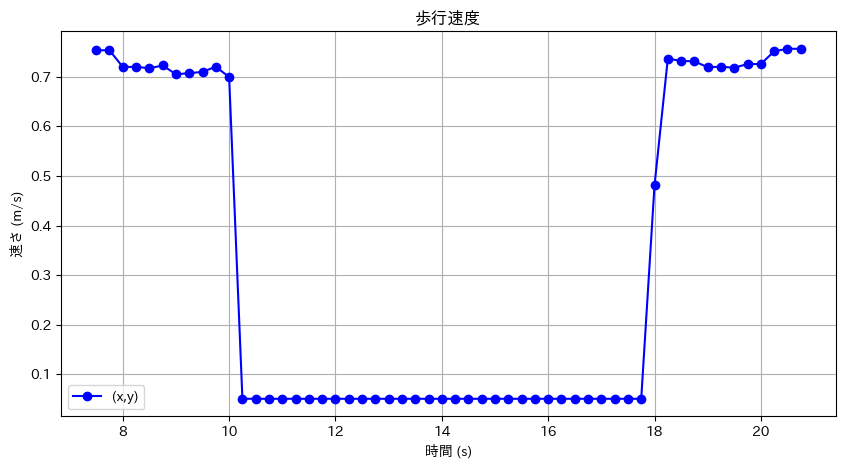

In [47]:
# 出力ファイル名
output_csv = "output_speed.csv"

# CSV出力
result_df.to_csv(output_csv, index=False)

# 結果を表示
print(result_df)

# 時間も1行目を除いて整形（速度と対応する時間）
time = df['time'][1:].reset_index(drop=True)

# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(time, speed, marker='o', linestyle='-', color='blue', label='(x,y)')
plt.xlabel('時間 (s)')
plt.ylabel('速さ (m/s)')
plt.title('歩行速度')
plt.grid(True)
plt.legend()